In [1]:
from ModelOptimizer import *
from FeatureAnalyzer import *
from Cleanup import *
from ModelValidator import *

In [2]:
data = pd.read_csv('Customer-Churn-Records.csv')
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
ordinal_columns = ['Card Type']
ordinal_mappings = [['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']]

In [3]:
pipeline, data_post_process = preprocessing_pipeline(data, 'Exited', columns_to_drop=columns_to_drop, ordinal_columns=ordinal_columns, ordinal_mappings=ordinal_mappings, date_columns=None)

2025-01-07 15:30:01,300 - INFO - Rozpoczęcie tworzenia pipeline'u przetwarzania danych.
2025-01-07 15:30:01,301 - INFO - Usuwane kolumny: ['RowNumber', 'CustomerId', 'Surname']
2025-01-07 15:30:01,309 - INFO - Zidentyfikowane cechy numeryczne: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
2025-01-07 15:30:01,310 - INFO - Zidentyfikowane cechy kategoryczne: ['Geography', 'Gender']
2025-01-07 15:30:01,312 - INFO - Zidentyfikowane cechy porządkowe: ['Card Type']
2025-01-07 15:30:01,313 - INFO - Zidentyfikowane cechy binarne: ['HasCrCard', 'IsActiveMember', 'Complain']
2025-01-07 15:30:01,314 - INFO - Tworzenie pipeline'u przetwarzania danych...
2025-01-07 15:30:01,361 - INFO - Liczba kolumn po przetwarzaniu: 16
2025-01-07 15:30:01,363 - INFO - Kolumny po przetwarzaniu: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Geography_France', 'Geography_Ge

In [4]:
data_post_process['Exited'] = np.random.choice([0, 1], size=len(data_post_process))

In [5]:
feature_analyzer = FeatureAnalyzer(data_post_process, 'Exited', 0.2)

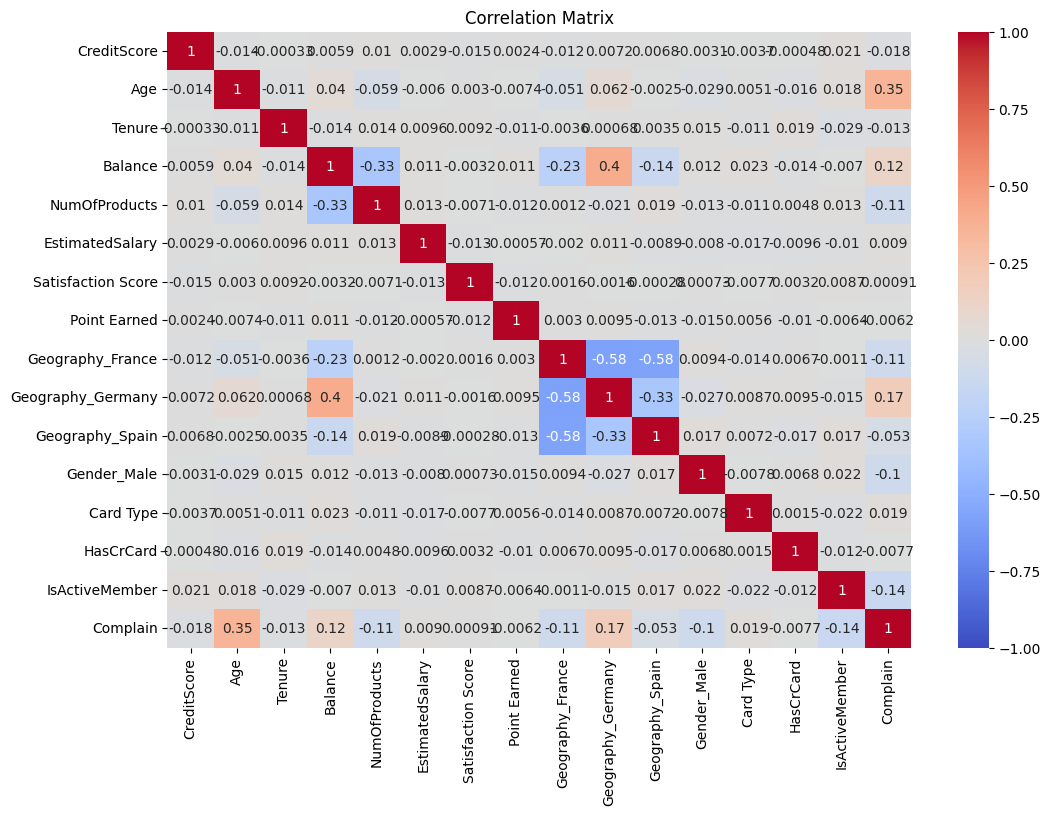

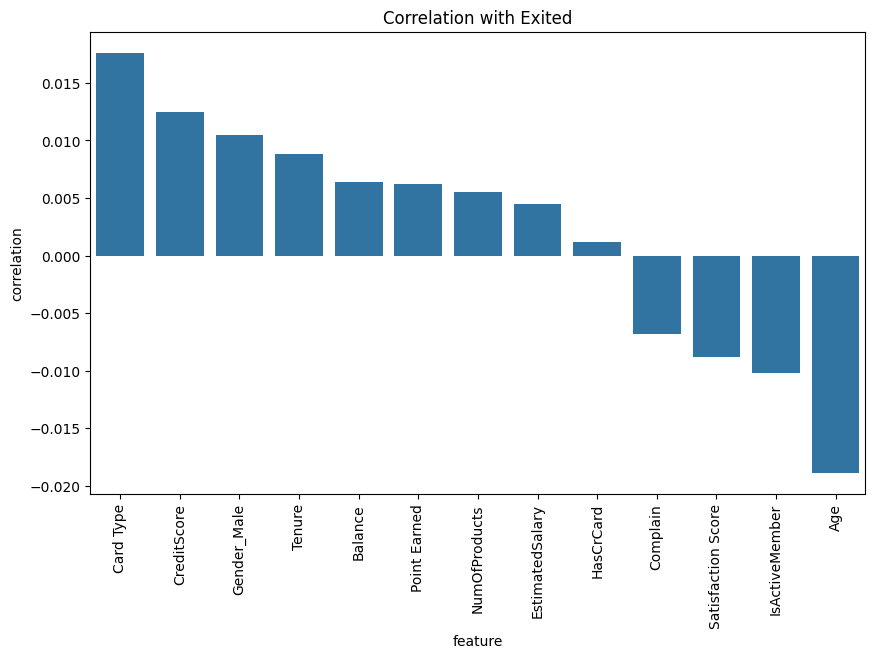

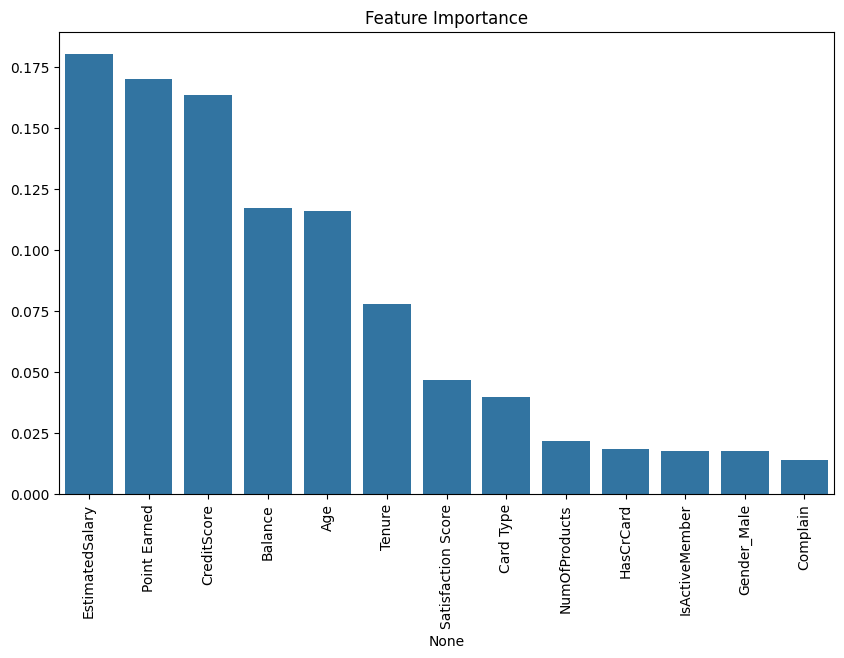

2025-01-07 15:30:15,155 - INFO - Usuwanie kolumn o wysokiej korelacji: 3
2025-01-07 15:30:15,156 - INFO - Tworzenie zmiennej golden na podstawie: EstimatedSalary
2025-01-07 15:30:15,156 - INFO - Utworzenie golden features w liczbie: 5
2025-01-07 15:30:15,157 - INFO - Końcowa liczba kolumn: 18


In [6]:
df, features = feature_analyzer.extract_best_features()

In [7]:
model_optimizer = ModelOptimizer(df, 'Exited')

D:\PycharmProjects\pythonProject1\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


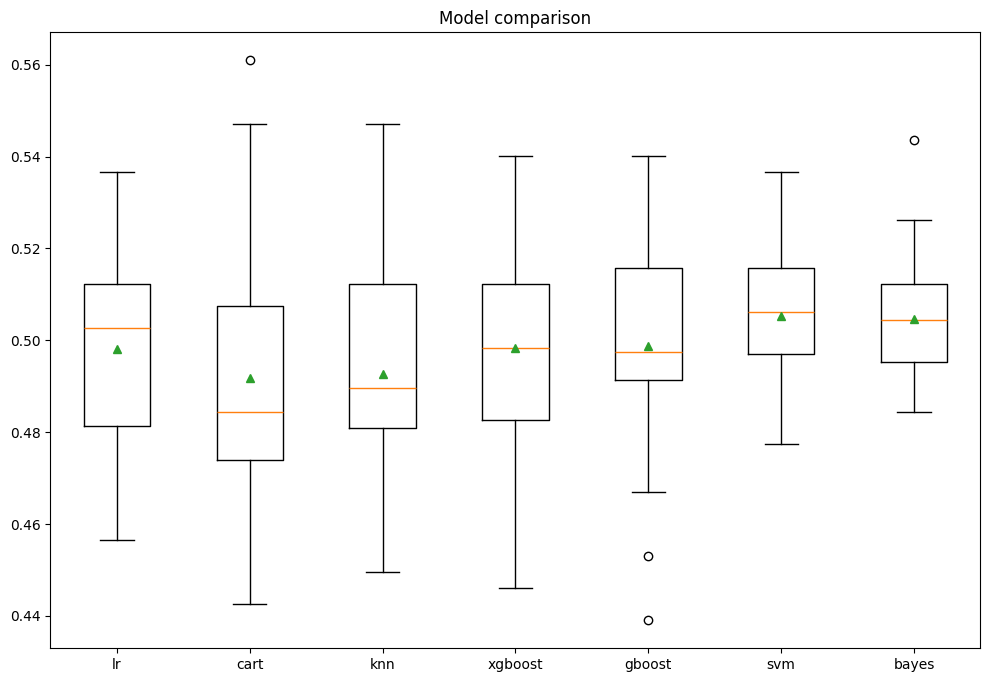

In [8]:
model_optimizer.get_models_candidates()

In [9]:
best_model = model_optimizer.optimilize_model('xgboost')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [10]:
model_validator = ModelValidator(df, 'Exited', best_model)

In [11]:
model_validator.fit_model()

In [13]:
model_validator.get_classification_report()

{'0': {'precision': 0.5106970324361628, 'recall': 0.5156794425087108, 'f1-score': 0.5131761442441054, 'support': 1435.0}, '1': {'precision': 0.5112517580872011, 'recall': 0.5062674094707521, 'f1-score': 0.5087473757872638, 'support': 1436.0}, 'accuracy': 0.5109717868338558, 'macro avg': {'precision': 0.510974395261682, 'recall': 0.5109734259897314, 'f1-score': 0.5109617600156846, 'support': 2871.0}, 'weighted avg': {'precision': 0.51097449187012, 'recall': 0.5109717868338558, 'f1-score': 0.5109609887219791, 'support': 2871.0}}
